In [1]:
import numpy as np

import astropy.units as u  
import astropy.constants as c
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.animation import FuncAnimation

from itertools import product

import sys
import os
import tqdm

bayestar_path = '/uufs/astro.utah.edu/common/home/u1371365/dustmaps/bayestar/bayestar2019.h5'
from dustmaps.bayestar import BayestarQuery

In [2]:
bayestar = BayestarQuery(bayestar_path, version='bayestar2019')
bayestar_dist = (bayestar.distances.to(u.pc)).value
distance = bayestar_dist[np.where(bayestar_dist < 1001)[0]]


l0, b0 = (163., -8.0)
l_ = np.linspace(l0 - 9., l0 + 9., 200)
b_ = np.linspace(b0 - 9., b0 + 9., 200)
l, b, d = np.meshgrid(l_, b_, distance)
print(l.shape)



coords = SkyCoord(l*u.deg, b*u.deg,
                  distance=distance*u.pc, frame='galactic')

reddening = 2.742 * bayestar(coords, mode='percentile', pct = (50, 16, 84)).astype(float) #Av
print(reddening.shape)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 48.543 s
  pix_info:   0.904 s
   samples:  28.586 s
      best:   4.941 s
       nan:   0.027 s
      sort:  13.926 s
       idx:   0.159 s
(200, 200, 49)
(200, 200, 49, 3)


In [3]:
print(bayestar_dist)

[   63.09573445    66.83439176    70.79457844    74.98942093
    79.43282347    84.13951416    89.12509381    94.40608763
   100.           105.92537252   112.20184543   118.85022274
   125.89254118   133.35214322   141.25375446   149.62356561
   158.48931925   167.88040181   177.827941     188.36490895
   199.5262315    211.34890398   223.87211386   237.13737057
   251.18864315   266.07250598   281.83829313   298.53826189
   316.22776602   334.96543916   354.81338923   375.83740429
   398.10717055   421.69650343   446.68359215   473.15125896
   501.18723363   530.88444423   562.34132519   595.66214353
   630.95734448   668.34391757   707.94578438   749.89420933
   794.32823472   841.39514165   891.25093813   944.06087629
  1000.          1059.25372518  1122.0184543   1188.50222744
  1258.92541179  1333.52143216  1412.53754462  1496.23565609
  1584.89319246  1678.80401812  1778.27941004  1883.64908949
  1995.26231497  2113.48903984  2238.72113857  2371.37370566
  2511.88643151  2660.72

In [4]:
# l0, b0 = (163., -8.0)
# l_ = np.arange(l0 - 10., l0 + 10., 0.1)
# b_ = np.arange(b0 - 10., b0 + 10., 0.1)
# bayestar = BayestarQuery(bayestar_path, version='bayestar2019')


# distance = np.arange(200, 600, 10)
# # l, b = np.meshgrid(l, b)
# l, b, d = np.meshgrid(l_, b_, distance)
# coords = SkyCoord(l*u.deg, b*u.deg,
#                   distance=distance*u.pc, frame='galactic')

# bayestar = BayestarQuery(bayestar_path, version='bayestar2019')
# reddening = 2.742 * bayestar(coords, mode='percentile', pct = (50, 16, 84)).astype(float) #Av
# print(reddening.shape)

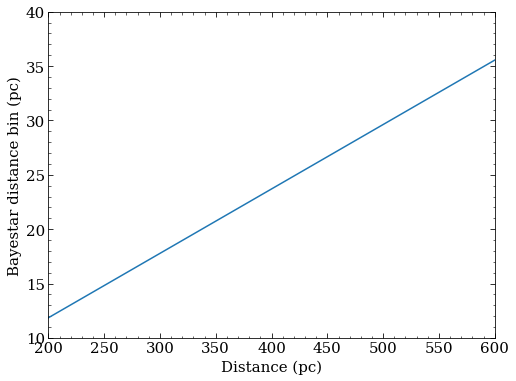

In [5]:
bayestar_dist = (bayestar.distances.to(u.pc)).value
ddist = bayestar_dist[1:] - bayestar_dist[0:-1]
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(bayestar_dist[:-1], ddist)
ax.set_xlim(200, 600)
ax.set_ylim(10, 40)
ax.set_xlabel("Distance (pc)")
ax.set_ylabel('Bayestar distance bin (pc)')
fig.set_facecolor('white')
fig.set_edgecolor('white')
plt.show()

# print(ddist)

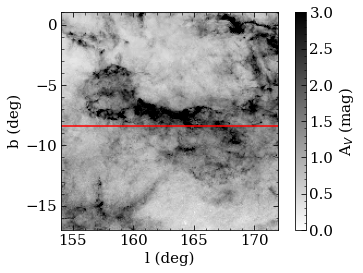

In [6]:
fig, ax = plt.subplots()
extent = (np.min(l_), np.max(l_), np.min(b_), np.max(b_))
im =  ax.imshow(reddening[:,:, -1,0], vmin = 0, vmax = 3, cmap = 'binary', extent = extent)
ax.plot(ax.get_xlim(), (b_[95], b_[95]), c = 'r')
fig.colorbar(im, label = 'A$_V$ (mag)')
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
plt.show()

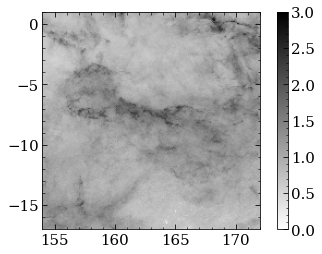

In [7]:
fig, ax = plt.subplots()
extent = (np.min(l), np.max(l), np.min(b), np.max(b))


im =  ax.imshow(np.sqrt(reddening[:,:, -1,0]), vmin = 0, vmax = 3, cmap = 'binary', extent = extent)
fig.colorbar(im)
# aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
# xy = np.arange(0,201, 10)
# ax.scatter(l[xy] , b[np.ones(len(xy)) * 100])
plt.show()

In [8]:
differential_reddening = reddening[:, :, 1:, 0] - reddening[:, :, 0:-1, 0] 

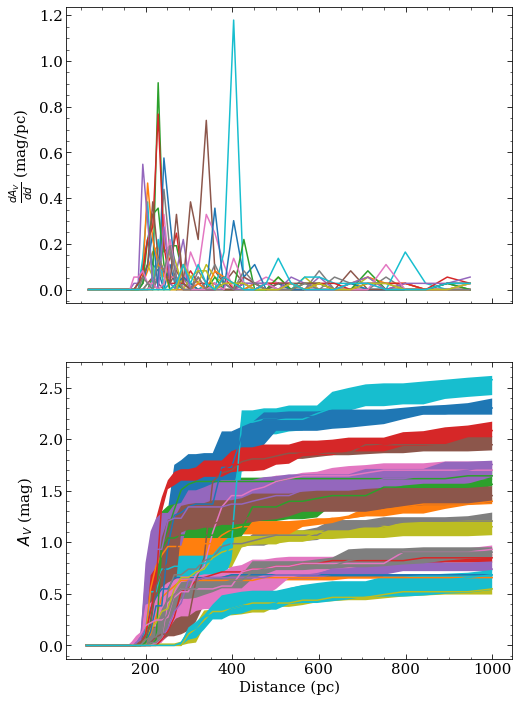

In [9]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 12), sharex = True)
for i in range(0, len(l), 10):

    axs[0].plot(distance[0:-1]+5, differential_reddening[i, i, :])
#     axs[0].fill_between(distance[0:-1]+5, differential_reddening[i, i, 2], differential_reddening[i, i, 1])
    axs[1].plot(distance, reddening[i, i, :, 0])
    axs[1].fill_between(distance, reddening[i, i, :, 2], reddening[i, i,:, 1])


    
# axs[0].set_yscale('log')
axs[1].set_xlabel('Distance (pc)')
axs[0].set_ylabel(r'$\frac{dA_V}{dd}$ (mag/pc)')
axs[1].set_ylabel(r'$A_V$ (mag)')

fig.set_facecolor('white')
fig.set_edgecolor('white')
plt.show()

In [10]:
# for i in range(0, len(l)):
#     extent = (np.min(b), np.max(b), np.min(distance), np.max(distance))
#     aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
#     fig, ax = plt.subplots()
#     im = ax.imshow(reddening[:, i, ::-1, 0].T ,extent = extent, aspect = aspect, vmin = 0, vmax = 3, cmap = 'binary')
#     ax.set_ylim(300, 600)
#     plt.show()

In [11]:
# for i in range(0, len(b)):
#     extent = (np.min(l), np.max(l), np.min(distance), np.max(distance))
#     aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
#     fig, ax = plt.subplots()
#     im = ax.imshow(differential_reddening[:, i, ::-1].T ,extent = extent, aspect = aspect,cmap = 'binary', vmin = 0 , vmax = 0.3)
#     ax.set_ylim(300, 600)
#     ax.set_xlabel('l (deg)')
#     ax.set_ylabel('Distance (pc)')
#     fig.colorbar(im, label = 'dAv/dd (mag/pc)', fraction=0.046, pad=0.04)
#     plt.show()

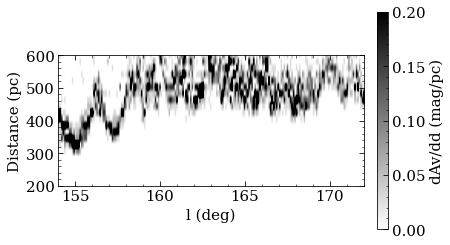

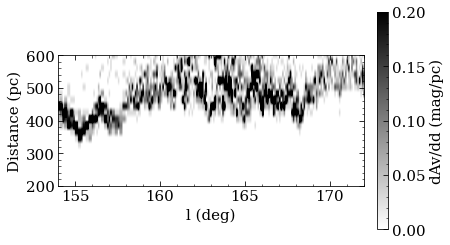

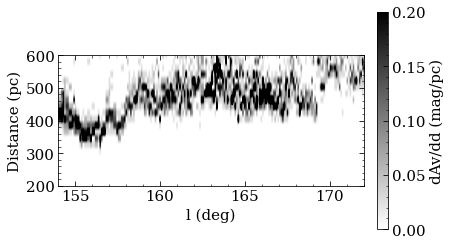

In [12]:
extent = (np.min(l), np.max(l), np.min(distance), np.max(distance))
aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
fig, ax = plt.subplots()
im = ax.imshow(differential_reddening[:, 90, ::-1].T ,extent = extent, aspect = aspect,cmap = 'binary', vmin = 0 , vmax = 0.2)
ax.set_ylim(200, 600)
ax.set_xlabel('l (deg)')
ax.set_ylabel('Distance (pc)')
fig.colorbar(im, label = 'dAv/dd (mag/pc)', fraction=0.046, pad=0.04)
plt.show()

extent = (np.min(l), np.max(l), np.min(distance), np.max(distance))
aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
fig, ax = plt.subplots()
im = ax.imshow(differential_reddening[:, 95, ::-1].T ,extent = extent, aspect = aspect,cmap = 'binary', vmin = 0 , vmax = 0.2)
ax.set_ylim(200, 600)
ax.set_xlabel('l (deg)')
ax.set_ylabel('Distance (pc)')
fig.colorbar(im, label = 'dAv/dd (mag/pc)', fraction=0.046, pad=0.04)
plt.show()



extent = (np.min(l), np.max(l), np.min(distance), np.max(distance))
aspect =  1/ ((extent[3] - extent[2]) / (extent[1]-extent[0]))
fig, ax = plt.subplots()
im = ax.imshow(differential_reddening[:, 100, ::-1].T ,extent = extent, aspect = aspect,cmap = 'binary', vmin = 0 , vmax = 0.2)
ax.set_ylim(200, 600)
ax.set_xlabel('l (deg)')
ax.set_ylabel('Distance (pc)')
fig.colorbar(im, label = 'dAv/dd (mag/pc)', fraction=0.046, pad=0.04)
plt.show()

In [13]:
from astropy.io import fits
image = fits.PrimaryHDU(reddening[:, :, :, 0])
hdul = fits.HDUList([image])
# hdul.append(fits.PrimaryHdu())
print(reddening[:, : , : , 0].shape)
print(coord_data.shape)
# print(coord_data.flatten().shape)
for coord in (l, b, d):
    hdul.append(fits.ImageHDU(coord))
hdul.writeto('thing.fits', overwrite = True)

from astropy.io import fits
image = fits.PrimaryHDU(differential_reddening[:, :, :])
hdul = fits.HDUList([image])
# hdul.append(fits.PrimaryHdu())
# hdul.writeto('diff_reddening.fits', overwrite = True)

(200, 200, 49)


NameError: name 'coord_data' is not defined

In [ ]:
l.shape

(200, 200, 49)

In [ ]:
co = fits.open('DHT21_Taurus_interp.fits')
co[0].header
# co[0].data

SIMPLE  =                    T  / Standard FITS format                          
BITPIX  =                   16  / Bits per pixel                                
NAXIS   =                    3  / Number of axes                                
NAXIS1  =                   81  / Number pixels on axis 1                       
NAXIS2  =                  307  / Number pixels on axis 2                       
NAXIS3  =                  213  / Number pixels on axis 3                       
CTYPE1  = 'VELO-LSR'            / axis 1 coord type                             
CRVAL1  =        -2.178010E+01  / coord value at CRPIX1                         
CDELT1  =         6.501900E-01  / linear pixel spacing axis 1                   
CRPIX1  =             1.000000  / ref pixel for axis 1                          
CTYPE2  = 'GLON-CAR'            / axis 2 coord type                             
CRVAL2  =         1.912500E+02  / coord value at CRPIX2                         
CDELT2  =        -1.250000E-

In [ ]:
from astropy.wcs import WCS
WCS(co[0].header)

In [ ]:
green = fits.open('green_solar_neighborhood_3D.fits')
print(green[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  800                                                  NAXIS2  =                  800                                                  NAXIS3  =                  120                                                  EXTEND  =                    T                                                  CTYPE1  = 'X       '                                                            CTYPE2  = 'Y       '                                                            CTYPE3  = 'Z       '                                                            CDELT1  =                    5                                                  CDELT2  =                    5                                                  CDELT3  =                    5          